<a href="https://www.kaggle.com/code/amnandeesh/gender-recognition-notebook?scriptVersionId=128184212" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [8]:

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob     
import gdown


In [9]:
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

data = []
labels = []

In [25]:
images_path = '/kaggle/working/images'

man_path = os.path.join(images_path, 'man')
woman_path = os.path.join(images_path, 'woman')

man_files = [os.path.join(man_path, f) for f in os.listdir(man_path) if os.path.isfile(os.path.join(man_path, f))]
woman_files = [os.path.join(woman_path, f) for f in os.listdir(woman_path) if os.path.isfile(os.path.join(woman_path, f))]


image_files = man_files + woman_files
random.shuffle(image_files)

In [26]:
for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] 
    if label == "woman":
        label = 1
    else:
        label = 0
        
    labels.append([label]) 

In [27]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) 
testY = to_categorical(testY, num_classes=2)

aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [28]:
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": 
        inputShape = (depth, height, width)
        chanDim = 1
    
    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model



In [29]:

model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)



model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])


model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)



/tmp/ipykernel_31/2047752268.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),


Epoch 1/100


2023-05-03 09:53:17.604436: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


28/28 [==============================] - 15s 162ms/step - loss: 0.8679 - accuracy: 0.6929 - val_loss: 0.7056 - val_accuracy: 0.4935
Epoch 2/100
28/28 [==============================] - 4s 144ms/step - loss: 0.5116 - accuracy: 0.7979 - val_loss: 0.6828 - val_accuracy: 0.5671
Epoch 3/100
28/28 [==============================] - 4s 139ms/step - loss: 0.4245 - accuracy: 0.8428 - val_loss: 0.6176 - val_accuracy: 0.6494
Epoch 4/100
28/28 [==============================] - 4s 135ms/step - loss: 0.3533 - accuracy: 0.8681 - val_loss: 0.8153 - val_accuracy: 0.4978
Epoch 5/100
28/28 [==============================] - 4s 141ms/step - loss: 0.3431 - accuracy: 0.8681 - val_loss: 0.9462 - val_accuracy: 0.7229
Epoch 6/100
28/28 [==============================] - 4s 159ms/step - loss: 0.3052 - accuracy: 0.8827 - val_loss: 0.8043 - val_accuracy: 0.5714
Epoch 7/100
28/28 [==============================] - 4s 136ms/step - loss: 0.2721 - accuracy: 0.8950 - val_loss: 0.6392 - val_accuracy: 0.6017
Epoch 8/10

<AxesSubplot: >

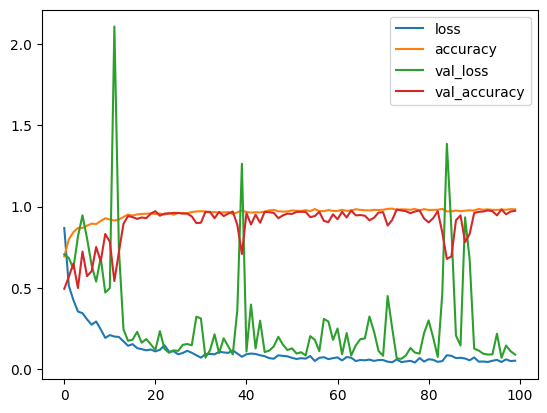

In [30]:
import pandas as pd
loss=pd.DataFrame(model.history.history)
loss.plot()

In [31]:
model.save('gender_detection.model')

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline


1/1 [==============================] - 0s 19ms/step


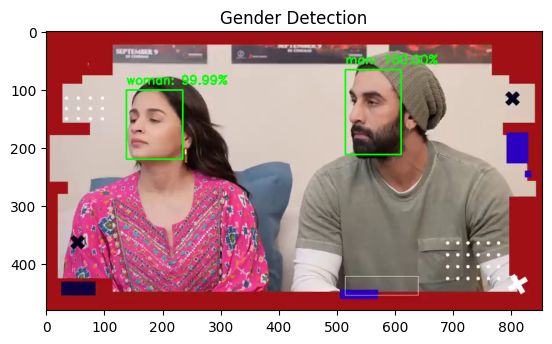

error: OpenCV(4.5.4) /tmp/pip-req-build-4x5kub8r/opencv/modules/highgui/src/window.cpp:1340: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [34]:
# load model
model = load_model('/kaggle/working/gender_detection.model')

# open webcam
webcam = cv2.VideoCapture('/kaggle/input/sample-test-video/sample video.mp4')
    
classes = ['man','woman']

# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()

    # apply face detection
    face, confidence = cv.detect_face(frame)


    # loop through detected faces
    for idx, f in enumerate(face):

        # get corner points of face rectangle        
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        # draw rectangle over face
        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)

        # crop the detected face region
        face_crop = np.copy(frame[startY:endY,startX:endX])

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue

        # preprocessing for gender detection model
        face_crop = cv2.resize(face_crop, (96,96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

        # apply gender detection on face
        conf = model.predict(face_crop)[0] # model.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]

        # get label with max accuracy
        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        # write label and confidence above face rectangle
        cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2)

    # display output
    plt.imshow(frame[:,:,::-1])
    plt.title('Gender Detection')
    plt.show()

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release resources
webcam.release()
cv2.destroyAllWindows()


In [3]:
pip install cvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 78.9 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046383 sha256=bdfa7898eb75ad950ec65d96d9cbe42b3d6a6edab0ce0f26d37a3368594ee066
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25859 sha256=58eae90d4104eb79973b8beaae1be4b7ac563dcee19e39d00a274c5d799d9d39
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=2970169fd2145a73965ccef4aa8488e45c9ec910a5a9985a943894b3345c59c6
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Succe

In [7]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [15]:
!conda install -y gdown

Retrieving notices: ...working... done

# >>>>>>>>>>>>>>>>>>>>>> ERROR REPORT <<<<<<<<<<<<<<<<<<<<<<

    Traceback (most recent call last):
      File "/opt/conda/lib/python3.10/site-packages/conda/gateways/repodata/__init__.py", line 161, in conda_http_errors
        yield
      File "/opt/conda/lib/python3.10/site-packages/conda/gateways/repodata/__init__.py", line 127, in repodata
        response.raise_for_status()
      File "/opt/conda/lib/python3.10/site-packages/requests/models.py", line 1021, in raise_for_status
        raise HTTPError(http_error_msg, response=self)
    requests.exceptions.HTTPError: 404 Client Error: Not Found for url: https://conda.anaconda.org/rapidsai/linux-64/current_repodata.json
    
    During handling of the above exception, another exception occurred:
    
    Traceback (most recent call last):
      File "/opt/conda/lib/python3.10/site-packages/requests/models.py", line 971, in json
        return complexjson.loads(self.text, **kwargs)
      File "

In [23]:
!gdown --id 110Hjpxzoum3uC2l1MQQIm6ic796KcYWT

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=110Hjpxzoum3uC2l1MQQIm6ic796KcYWT
From (redirected): https://drive.google.com/uc?id=110Hjpxzoum3uC2l1MQQIm6ic796KcYWT&confirm=t&uuid=6820dd40-0045-4d2c-9b28-a4c509583cc5
To: /kaggle/working/images.zip
100%|██████████████████████████████████████| 72.0M/72.0M [00:01<00:00, 44.2MB/s]


In [24]:
import zipfile

with zipfile.ZipFile('/kaggle/working/images.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/')